# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X=6*np.random.rand(100,1)-3
y=0.5*X**2+1.5*X+2+np.random.randn(100,1) # 0.5x^2+1.5x+2+outlier

Text(0, 0.5, 'Y dataset')

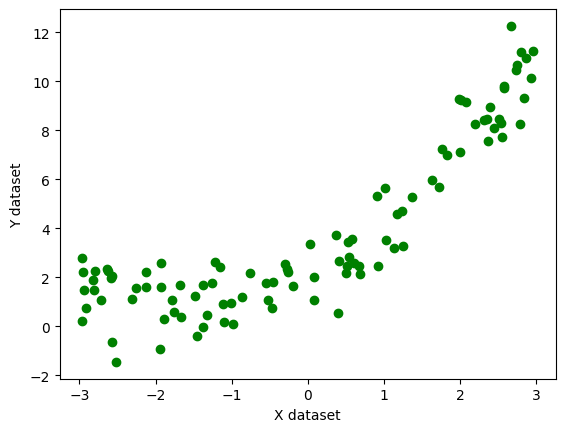

In [4]:
plt.scatter(X,y,color='green')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
## Lets implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [7]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [8]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(X_test))
score

0.595309012100854

Text(0, 0.5, 'Y')

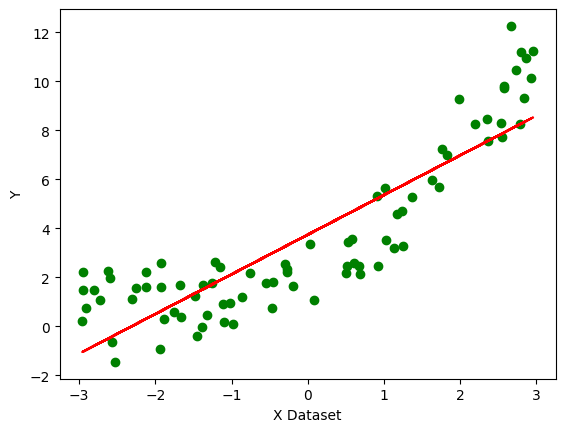

In [9]:
## Lets visualize this model
plt.plot(X_train,regression_1.predict(X_train),color="red")
plt.scatter(X_train,y_train,color="green")
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [10]:
# Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [14]:
X_train_poly[:5]

array([[ 1.        ,  0.51697776,  0.267266  ],
       [ 1.        , -2.11875925,  4.48914075],
       [ 1.        , -0.26778662,  0.07170968],
       [ 1.        ,  2.36292991,  5.58343775],
       [ 1.        ,  2.95601871,  8.73804663]])

In [15]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.910012922691598


In [17]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.58212518 0.45671476]]
[2.1670812]


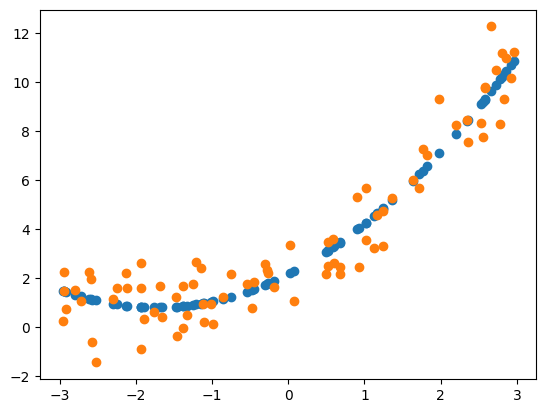

In [21]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [22]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [23]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9000332887171456


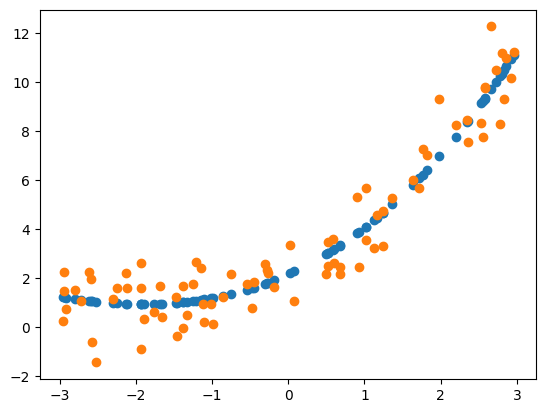

In [24]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [30]:
# Prediction of new dataset
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)

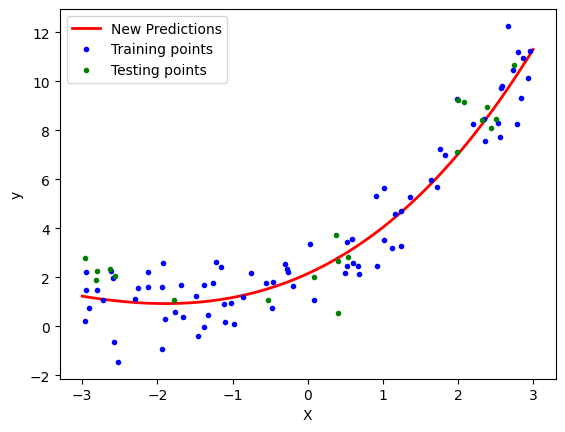

In [37]:
y_new=regression.predict(X_new_poly)
plt.plot(X_new,y_new,'r-',linewidth=2,label="New Predictions")
plt.plot(X_train,y_train,'b.',label="Training points")
plt.plot(X_test,y_test,'g.',label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Pipeline Concept

In [38]:
from sklearn.pipeline import Pipeline

In [55]:
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## create polynomial features and fit linear regression
    y_pred_new=poly_regression.predict(X_new)
    plt.plot(X_new,y_pred_new,'r-',linewidth=2,label="Degree "+str(degree))
    plt.plot(X_train,y_train,'b.',label="Training points")
    plt.plot(X_test,y_test,'g.',label="Testing points")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

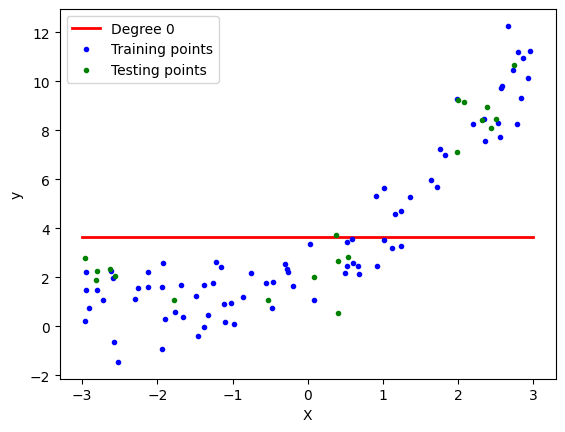

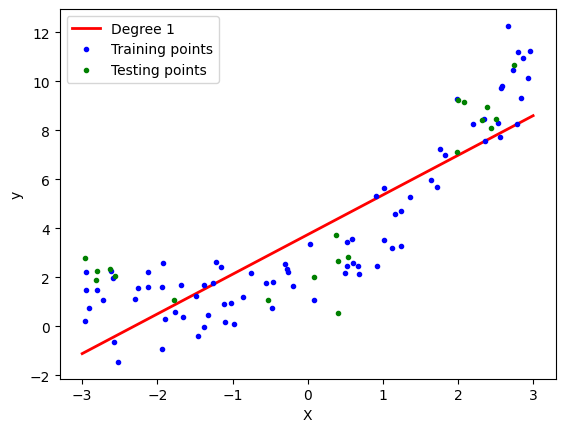

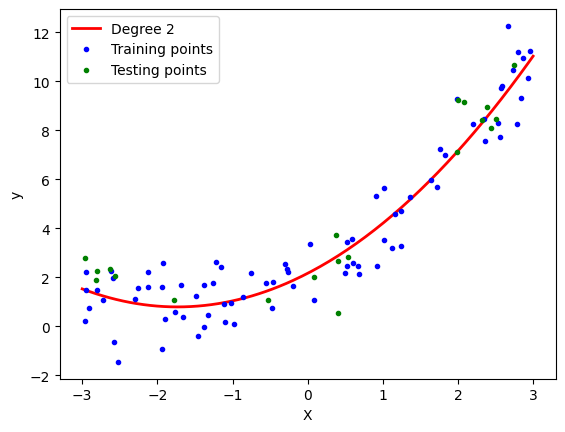

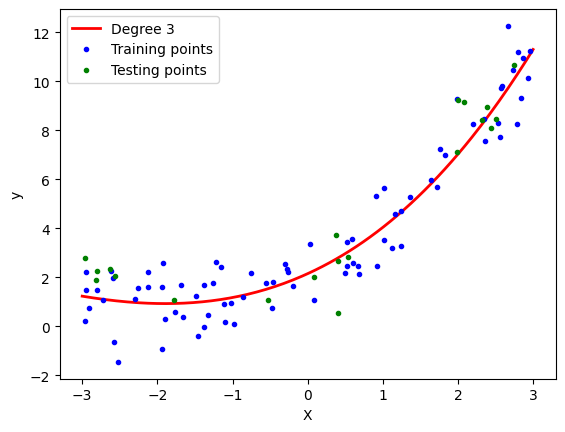

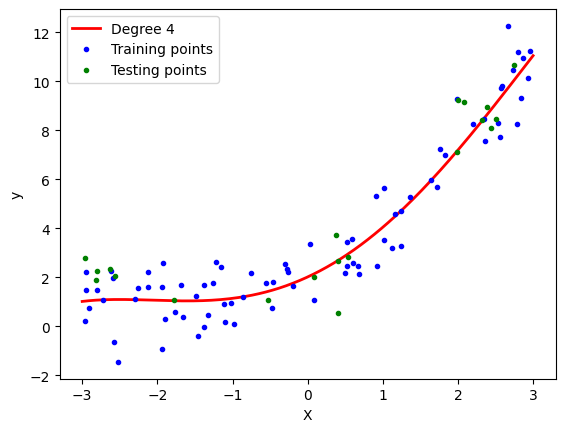

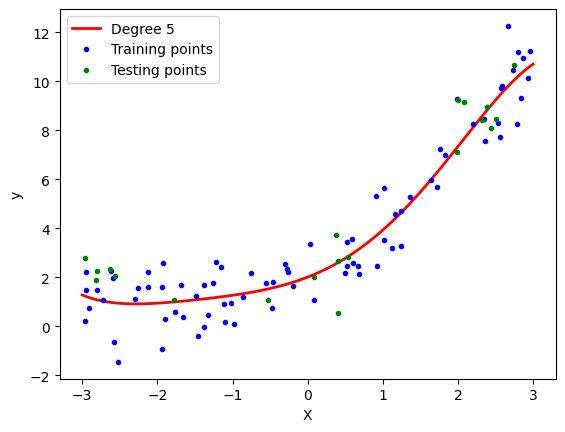

In [58]:
for i in range(0,6):
    poly_regression(i)